#### CSCE 670 :: Information Storage and Retrieval :: Texas A&M University :: Spring 2018


# Homework 1:  Basic Machine Learning + Learning to Rank 

### 100 points [5% of your final grade]

### Due: Monday, February 12 by 11:59pm

*Goals of this homework:* In this homework you will get hands-on experience with (i) the basics of machine learning (e.g. train/test data, cross-validation, different classifiers) and interpreting results; and (ii) learning to rank.

*Submission Instructions:* To submit your homework, rename this notebook as UIN_hw#.ipynb. For example, this homework submission would be: YourUIN_hw1.ipynb. Submit this notebook via ecampus. Your notebook should be completely self-contained, with the results visible in the notebook. 

*Late submission policy:* For this homework, you may use up to three of your late days, meaning that no submissions will be accepted after Thursday, February 15 at 11:59pm.

*Collaboration policy:* You are expected to complete each homework independently. Your solution should be written by you without the direct aid or help of anyone else. However, we believe that collaboration and team work are important for facilitating learning, so we encourage you to discuss problems and general problem approaches (but not actual solutions) with your classmates. You may post on Piazza, search StackOverflow, etc. But if you do get help in this way, you must inform us by **filling out the Collaboration Declarations at the bottom of this notebook**. 

*Example: I found helpful code on stackoverflow at https://stackoverflow.com/questions/11764539/writing-fizzbuzz that helped me solve Problem 2.*

The basic rule is that no student should explicitly share a solution with another student (and thereby circumvent the basic learning process), but it is okay to share general approaches, directions, and so on. If you feel like you have an issue that needs clarification, feel free to contact either me or the TA.

# Part 1: Basics of ML (70 points)

For this part, we're going to get familiar with scikit-learn (a great ML toolkit that is very popular) and the major issues in training a model, testing it, and interpreting the results. Our goal in this assignment is to build a classifier to determine if a Yelp review is "food-relevant" or not.

## Dataset: Yelp review data

First, you will need to download the training_data.json file from the Resources tab on Piazza, a collection of 40,000 json-encoded Yelp reviews we sampled from the [Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge).

You'll see that each line corresponds to a review on a particular business. The label (class) information of each review is in the "label" field. It is **either "Food-relevant" or "Food-irrelevant"**.

## Part 1.1: Parsing Yelp (15 points)

For this first part, we will build a parser for extracting tokens from the **review text** only. First, you should tokenize each review using **whitespaces and punctuations as delimiters**. Do not remove stopwords. You should apply casefolding (lower case everything) and use the [nltk Porter stemmer](http://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) ... you may need to install nltk if you don't have it already. 

In [2]:
# your code here
# use as many cells as you need
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

print("Hello")

text = []
    
with open('training_data.json') as data_file:
    for line in data_file:
        data = json.loads(line)
        text.append(data['text'].lower())
    
ps = PorterStemmer()
list1 = []
unique_tokens = set()
for i in text:
     list1.append(word_tokenize(i.encode('ascii', 'ignore').decode('ascii')))

dict = {}
for i in list1:
    for j in i:
        if ps.stem(j) in dict and ps.stem(j) != '.' and ps.stem(j)!= ',':
            dict[ps.stem(j)] += 1
        else:
            dict[ps.stem(j)] = 1
        
         #unique_tokens.add(ps.stem(j))

# print(unique_tokens)
# print(len(unique_tokens))
print(sorted(dict.items(), key=lambda x: x[1], reverse=True))

Hello
[(u'the', 245729), (u'i', 168215), (u'and', 168032), (u'a', 134024), (u'to', 127570), (u'it', 78529), (u'wa', 77154), (u'of', 76024), (u'is', 65155), (u'for', 60780), (u'in', 59689), (u'!', 51313), (u'that', 50727), (u'my', 50497), (u'you', 45700), (u'they', 43485), (u'have', 40085), (u'thi', 39808), (u'with', 39303), (u'but', 37754), (u'on', 35108), (u"'s", 34320), (u"n't", 33615), (u'we', 31528), (u'not', 30354), (u'are', 27791), (u'had', 27710), (u'at', 26684), (u'so', 25609), (u'be', 25362), (u'place', 24930), (u'me', 23555), (u'there', 22897), (u')', 22818), (u'as', 21171), (u'were', 21058), (u'(', 20637), (u'good', 20586), (u'do', 19921), (u'get', 19490), (u'time', 19295), (u'go', 19288), (u'like', 19129), (u'...', 18677), (u'if', 18495), (u'great', 17841), (u'all', 17671), (u'out', 17670), (u'here', 17394), (u'food', 17365), (u'veri', 16476), (u'one', 16284), (u'just', 16261), (u'when', 15036), (u'or', 15035), (u'from', 14754), (u'would', 14409), (u'their', 14196), (u'up',

### Unique tokens?

Once you have your parser working, you should report here the size of your feature space. That is, how many unique tokens do you find?

In [4]:
# your code here
print(len(dict.keys()))

56250


### The Most Popular Words

Great, now we can tokenize the documents. Let's make a list of the most popular words in our reviews. For this step, you should maintain a count of how many times each word occurs. Then you should print out the top-20 words in your reviews.

Your output should look like this:

Rank Token Count

1 awesome 78

... ...

In [5]:
# your code here

sorted_dict = sorted(dict.items(), key=lambda x: x[1], reverse=True)
#print(sorted_dict)
i = 1
print "Rank", "Token", "Count"
for k,v in sorted_dict:
    print str(i) + " "+str(k) + " "+str(v)
    i += 1
    if i > 20:
        break

Rank Token Count
1 the 245729
2 i 168215
3 and 168032
4 a 134024
5 to 127570
6 it 78529
7 wa 77154
8 of 76024
9 is 65155
10 for 60780
11 in 59689
12 ! 51313
13 that 50727
14 my 50497
15 you 45700
16 they 43485
17 have 40085
18 thi 39808
19 with 39303
20 but 37754


### Zipf's Law

Recall in class our discussion of Zipf's law. Let's see if this law applies to our Yelp reviews. You should use matplotlib to plot the log-base10 term counts on the y-axis versus the log-base10 rank on the x-axis. Your aim is to create a figure like the one in Figure 5.2 of the textbook.

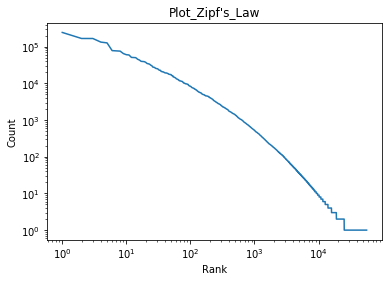

In [7]:
# your code here
import matplotlib.pyplot as plt
i = 1
rank = []
count = []

for k,v in sorted_dict:
        rank.append(i)
        i += 1
        count.append(v)
#print(rank)
#print(count)

plt.title("Plot_Zipf's_Law")
plt.ylabel("Count")
plt.xlabel("Rank")
plt.loglog(rank, count, basex=10)
plt.show()


What do you observe? Is this consistent with Zipf's law?

*Your answer goes here*

Yes, It is consistent with the Zipf's Law as described in class as, the shape of the graph is the same. Though, I observe that the graph that comes here is a little flatter, meaning, that it is a little more inclined towards the 45 degree line, instead of the top right corner as shown.

## Part 1.2: Feature Represenation (10 points)

In this part you will build feature vectors for each review. This will be input to our ML classifiers. You should call your parser from earlier, using all the same assumptions (e.g., casefolding, stemming). Each feature value should be the term count for that review.

In [5]:
# your text here
'''
Here I present two appraoches of making the feature vectors!

Approach 1: Not using CountVectorizer() -- this approach works, but, takes up a huge amount of memory.
I have an old computer and if I run the entire dataset, it hangs the system makes it difficult to work.
I divided the dataset into only 5k reviews and it works fine. 

Approach 2: This was after I discussed with a few of my friends that we could use this approach as well.
And surprisingly, it gives me less columns in vectors! Even for this, I had to divide the dataset
into only 1000 reviews. Any more than that, and my system crashed!! Many thanks to my friends - Aditya, Snehil
and the link on Piazza for telling me that we can override the CountVectorizer's tokenizer, 
as given here: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
and here: https://stackoverflow.com/questions/23980755/scikit-learn-grid-search-with-custom-countvectorizer-tokenizer
and here: https://www.programcreek.com/python/example/84841/sklearn.feature_extraction.text.CountVectorizer

Please take this into account while making the final assessment.
'''



import pandas as pd
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

'''
#APPROACH 1:
text = []
with open('test2.json') as data_file:
    for line in data_file:
        data = json.loads(line)
        text.append(data['text'].lower())
    
ps = PorterStemmer()
list1 = []
unique_tokens = set()
for i in text:
     list1.append(word_tokenize(i.encode('ascii', 'ignore').decode('ascii')))


list_stem = []
total= set()

for i in list1:
        list_temp = []
        for j in i:
            if ps.stem(j) != '.' and ps.stem(j) != ',':
                list_temp.append(ps.stem(j))
                total.add(ps.stem(j))
        list_stem.append(list_temp)

#print(list_stem)
#print(total)

vector= []

for i in list_stem:
    dict_temp = {}
    for k in total:
        dict_temp[k] = 0
    for j in i:
        if j in dict_temp:
            dict_temp[j] += 1
    vector.append(dict_temp)
#print(vector)

df = pd.DataFrame(vector)
print(df.shape)
'''

#APPROACH 2
data_train = []

with open('test2.json') as data_file:
    for line in data_file:
        data = json.loads(line)
        data_train.append(data['text'].lower())

total = set()
final = []

def self_function(review):
    tk = RegexpTokenizer("\w+")
    tokens = tk.tokenize(review);
    ps = PorterStemmer()
    for i in tokens:
        total.add(ps.stem(i))
    #print(list(total))
    return(list(total))
 


vector = CountVectorizer(tokenizer = self_function)
train_data = vector.fit_transform(data_train)

print(train_data.shape)


(10000, 18492)


## Part 1.3: Machine Learning Basics (30 points)

In this part you will evaluate a bunch of classifiers -- kNN, Decision tree, Naive Bayes, and SVM -- on the feature vectors generated in the previous task in two different settings. **You do not need to implement any classifier from scratch. You may use scikit-learn's built-in capabilities.**

### Setting 1: Splitting data into train-test 

In the first setting, you should treat the first 70% of your data as training. The remaining 30% should be for testing. 

### Setting 2: Using 5 fold cross-validation

In the second setting, use 5-folk cross-validation. 

### What to report

* Report the overall accuracy for both settings.
* For the class "Food-relevant", report the precision and recall for both settings.
* For the class "Food-irrelevant", report the precision and recall for both settings.

In [2]:
# your code here...plus add cells for reporting your results
from sklearn.model_selection import train_test_split
from __future__ import division
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


l_data = []
    
with open('test2.json') as data_file:
    for line in data_file:
        data = json.loads(line)
        l_data.append(data['label'].lower())
y = pd.DataFrame(l_data)

X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.3)

classifier = MultinomialNB().fit(X_train, y_train)
prediction = classifier.predict(X_test)

print 'NORMAL NAIVE BAYES!'

print "Accuracy"
print accuracy_score(y_test, prediction)
mat = confusion_matrix(y_test, prediction)
print "Precision for Food-relevant : " + str(mat[0][0]/(mat[0][1]+ mat[0][0]))
print "Precision for Food-irrelevant : " + str(mat[1][1]/(mat[1][0]+ mat[1][1]))
print "Recall for Food-relevant : " + str(mat[0][0]/(mat[1][0]+ mat[0][0]))
print "Recall for Food-irrelevant : " + str(mat[1][1]/(mat[0][1]+ mat[1][1]))


print('\n')
print 'K-FOLD NAIVE BAYES'

classifier = MultinomialNB().fit(X_train, y_train)
prediction = cross_val_predict(classifier, train_data, l_data, cv=5)
print "Accuracy"
print accuracy_score(l_data, prediction)
mat = confusion_matrix(l_data, prediction)
print "Precision for Food-relevant : " + str(mat[0][0]/(mat[0][1]+ mat[0][0]))
print "Precision for Food-irrelevant : " + str(mat[1][1]/(mat[1][0]+ mat[1][1]))
print "Recall for Food-relevant : " + str(mat[0][0]/(mat[1][0]+ mat[0][0]))
print "Recall for Food-irrelevant : " + str(mat[1][1]/(mat[0][1]+ mat[1][1]))

C:\Users\pragy\Anaconda2\envs\cs670\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NORMAL NAIVE BAYES!
Accuracy
0.6363333333333333
Precision for Food-relevant : 0.2414187643020595
Precision for Food-irrelevant : 0.7986829727187206
Recall for Food-relevant : 0.3302034428794992
Recall for Food-irrelevant : 0.7191867852604829


K-FOLD NAIVE BAYES
Accuracy
0.629
Precision for Food-relevant : 0.2
Precision for Food-irrelevant : 0.8
Recall for Food-relevant : 0.285
Recall for Food-irrelevant : 0.715


In [3]:
print "DECISION TREE"
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)

print "Accuracy"
print accuracy_score(y_test, predictions)
mat = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))
print "Precision for Food-relevant : " + str(mat[0][0]/(mat[0][1]+ mat[0][0]))
print "Precision for Food-irrelevant : " + str(mat[1][1]/(mat[1][0]+ mat[1][1]))
print "Recall for Food-relevant : " + str(mat[0][0]/(mat[1][0]+ mat[0][0]))
print "Recall for Food-irrelevant : " + str(mat[1][1]/(mat[0][1]+ mat[1][1]))

DECISION TREE
Accuracy
0.9676666666666667
                 precision    recall  f1-score   support

food-irrelevant       0.95      0.94      0.94       874
  food-relevant       0.98      0.98      0.98      2126

    avg / total       0.97      0.97      0.97      3000

Precision for Food-relevant : 0.9405034324942791
Precision for Food-irrelevant : 0.9788334901222954
Recall for Food-relevant : 0.9480968858131488
Recall for Food-irrelevant : 0.9756211908110642


In [5]:
print "\n"
print "K-FOLD DECISION TREE"
dtree = DecisionTreeClassifier()
predictions = cross_val_predict(dtree, train_data, l_data, cv=5)
print "Accuracy"
print accuracy_score(l_data, predictions)
mat = confusion_matrix(l_data, predictions)
print(classification_report(l_data, predictions))
print "Precision for Food-relevant : " + str(mat[0][0]/(mat[0][1]+ mat[0][0]))
print "Precision for Food-irrelevant : " + str(mat[1][1]/(mat[1][0]+ mat[1][1]))
print "Recall for Food-relevant : " + str(mat[0][0]/(mat[1][0]+ mat[0][0]))
print "Recall for Food-irrelevant : " + str(mat[1][1]/(mat[0][1]+ mat[1][1]))



K-FOLD DECISION TREE
Accuracy
0.4885
                 precision    recall  f1-score   support

food-irrelevant       0.28      0.52      0.37      2850
  food-relevant       0.71      0.48      0.57      7150

    avg / total       0.59      0.49      0.51     10000

Precision for Food-relevant : 0.5207017543859649
Precision for Food-irrelevant : 0.4756643356643357
Recall for Food-relevant : 0.2835849417160329
Recall for Food-irrelevant : 0.7134466121250262


In [6]:
print("KNN")

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

print "Accuracy"
print accuracy_score(y_test, predictions)
mat = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))
print "Precision for Food-relevant : " + str(mat[0][0]/(mat[0][1]+ mat[0][0]))
print "Precision for Food-irrelevant : " + str(mat[1][1]/(mat[1][0]+ mat[1][1]))
print "Recall for Food-relevant : " + str(mat[0][0]/(mat[1][0]+ mat[0][0]))
print "Recall for Food-irrelevant : " + str(mat[1][1]/(mat[0][1]+ mat[1][1]))


KNN


C:\Users\pragy\Anaconda2\envs\cs670\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy
0.9723333333333334
                 precision    recall  f1-score   support

food-irrelevant       0.96      0.94      0.95       874
  food-relevant       0.98      0.98      0.98      2126

    avg / total       0.97      0.97      0.97      3000

Precision for Food-relevant : 0.9439359267734554
Precision for Food-irrelevant : 0.9840075258701787
Recall for Food-relevant : 0.9604190919674039
Recall for Food-irrelevant : 0.9771134983652499


In [7]:
print "\n"
print "K-FOLD KNN"
knn = KNeighborsClassifier(n_neighbors = 1)
predictions = cross_val_predict(knn, train_data, l_data, cv=5)
print "Accuracy"
print accuracy_score(l_data, predictions)
mat = confusion_matrix(l_data, predictions)
print(classification_report(l_data, predictions))
print "Precision for Food-relevant : " + str(mat[0][0]/(mat[0][1]+ mat[0][0]))
print "Precision for Food-irrelevant : " + str(mat[1][1]/(mat[1][0]+ mat[1][1]))
print "Recall for Food-relevant : " + str(mat[0][0]/(mat[1][0]+ mat[0][0]))
print "Recall for Food-irrelevant : " + str(mat[1][1]/(mat[0][1]+ mat[1][1]))



K-FOLD KNN
Accuracy
0.4847
                 precision    recall  f1-score   support

food-irrelevant       0.28      0.52      0.36      2850
  food-relevant       0.71      0.47      0.57      7150

    avg / total       0.59      0.48      0.51     10000

Precision for Food-relevant : 0.5178947368421053
Precision for Food-irrelevant : 0.47146853146853146
Recall for Food-relevant : 0.2808753568030447
Recall for Food-irrelevant : 0.710432033719705


In [7]:
print("SVM")

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from __future__ import division
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import pandas as pd


l_data = []
    
with open('test2.json') as data_file:
    for line in data_file:
        data = json.loads(line)
        l_data.append(data['label'].lower())
y = pd.DataFrame(l_data)

X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.3)

model = SVC()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print "Accuracy"
print accuracy_score(y_test, predictions)
mat = confusion_matrix(y_test, predictions)

print "Precision for Food-relevant : " + str(mat[0][0]/(mat[0][1]+ mat[0][0]))
print "Precision for Food-irrelevant : " + str(mat[1][1]/(mat[1][0]+ mat[1][1]))
print "Recall for Food-relevant : " + str(mat[0][0]/(mat[1][0]+ mat[0][0]))
print "Recall for Food-irrelevant : " + str(mat[1][1]/(mat[0][1]+ mat[1][1]))
print(classification_report(y_test, predictions))

print "\n"
print "K-FOLD SVM"
model = SVC()
predictions = cross_val_predict(model, train_data, l_data, cv=5)
print "Accuracy"
print accuracy_score(l_data, predictions)
mat = confusion_matrix(l_data, predictions)
print(classification_report(l_data, predictions))
print "Precision for Food-relevant : " + str(mat[0][0]/(mat[0][1]+ mat[0][0]))
print "Precision for Food-irrelevant : " + str(mat[1][1]/(mat[1][0]+ mat[1][1]))
print "Recall for Food-relevant : " + str(mat[0][0]/(mat[1][0]+ mat[0][0]))
print "Recall for Food-irrelevant : " + str(mat[1][1]/(mat[0][1]+ mat[1][1]))


SVM
Accuracy
0.7703333333333333
Precision for Food-relevant : 0.26173708920187794
Precision for Food-irrelevant : 0.9720670391061452
Recall for Food-relevant : 0.7879858657243817
Recall for Food-irrelevant : 0.7684946632315053
                 precision    recall  f1-score   support

food-irrelevant       0.79      0.26      0.39       852
  food-relevant       0.77      0.97      0.86      2148

    avg / total       0.77      0.77      0.73      3000



## Part 1.4: Analyzing your results (5 points) 

OK, now that you have tried four different classifiers, what do you observe? Any conclusions you can draw? Give us one or two paragraphs summarizing your findings.

In [10]:
# RESULTS SUMMARY

Disclaimer: I split the data into only 10k reviews because my computer could not handle the load of the
entire dataset. Hence, my results might vary from the expected results.

The best performance has been given by KNN and then Decision Trees. KNN, frankly speaking, is a little
surprising since I chose the nearest neighbours to be only 1. I needed to optimise to find the 
best results, or the minimum error by changign the number of neighbours. However, once again, that was
extremely time consuming, and I decided to go with what I obtained.

Another conclusion can be that the k-fold algorithms have consistently given worse results than the 
normal algorithms.


'\nDisclaimer: I split the data into only 10k reviews because my computer could not handle the load of the\nentire dataset. Hence, my results might vary from the expected results.\n\nThe best performance has been given by KNN and then Decision Trees. KNN, frankly speaking, is a little\nsurprising since I chose the nearest neighbours to be only 1. I needed to optimise to find the \nbest results, or the minimum error by changign the number of neighbours. However, once again, that was\nextremely time consuming, and I decided to go with what I obtained.\n\nAnother conclusion can be that the k-fold algorithms have consistently given worse results than the \nnormal algorithms.\n'

*add your discussion here*

## Part 1.5: Improving your classifier (10 points)

I think we can do better! In this part, your job is to create new features that you can think can help improve your classifier. You may choose to use new weightings for your words, new derived features (e.g., count of 3-letter words), or whatever you like. You may also add in the extra features in the json: funny, useful, cool. You will need to experiment with different approaches ... once you finalize on your best approach, include the features here with a description (that is, tell us what the feature means). Then give us your classifier results!

In [3]:
# your code here ... add as many cells as you need for features, results, and discussion.
Attempt1: I did not use the built in CountVectorizer and analyzed on the getting the tokens by 
Vanilla Python (AS SHOWN IN PART 1.1). This way I had a lot more tokens - around 56k instead of around 38k that I got for
CountVectorizer. However, once again, I had to clip the data (test2) in order for my system to take the load
and the results are as follows:
    - Ran Normal Naive Bayes Classifier, that gave me an accuracy of 60%, a 3% lower than the 
    CountVectorize Approach
    - Ran KNN Classifier, since that gave me the best results, and the accuracy dropped by an astonishing
    8% to around 89%.
    
    This was to be expected as the number of tokens are increasing in the analysis and the relevant 
    words in the entire corpus is decreasing as a percentage.

Attempt2: Using CountVectorizer and putting a threshold for the features. Simply put, if a number of occurances
        for a word is less than 100 a 25% of the time, I deleted that entire feature from the feature matrix.
        My thinking for doing this was that, the word which occur less would have less relevance, and hence, deleting 
        them from the analysis would increase the 'weight' of the words which are more relevant.
        I might be incorrect in my logic, but it did give me a few better results.
        
        This gave me better results:
        - Ran Normal Naive Bayes Classifier, it gave me a boost of around 4% in accuracy, to 67%
        - Ran KNN Classifier, it was almost the same at 97.65% in accuracy.
    
I could have experimented with the threshold(change 100 to 200 or change 25% to 50% probably or 10%) 
and maybe gotten better results. But this is what I could do with the time I had.
        


SyntaxError: invalid syntax (<ipython-input-3-9ddc6a14c4a8>, line 2)

### BONUS: What are the most informative features in distinguishing these two classes?

In [19]:
# Your code here
We could probably do a Logistic Regression on the points and get the feature importance by 
getting the feature coefficients (inbuilt in scikit-learn). I wanted to try it, but I did not have any time.

Please do indeed tell me if I am thinking on the correct line!

# Part 2: Learning to Rank (30 points)

For this part, we're going to play with some Microsoft LETOR data that has query-document relevance judgments. Let's see how learning to rank works in practice. 

First, you will need to download the MQ2008.zip file from the Resources tab on Piazza. This is data from the [Microsoft Research IR Group](https://www.microsoft.com/en-us/research/project/letor-learning-rank-information-retrieval/).

The data includes 15,211 rows. Each row is a query-document pair. The first column is a relevance label of this pair (0,1 or 2--> the higher value the more related), the second column is query id, the following columns are features, and the end of the row is comment about the pair, including id of the document. A query-document pair is represented by a 46-dimensional feature vector. Features are a numeric value describing a document and query such as TFIDF, BM25, Page Rank, .... You can find compelete description of features from [here](https://arxiv.org/ftp/arxiv/papers/1306/1306.2597.pdf).

The good news for you is the dataset is ready for analysis: It has already been split into 5 folds (see the five folders called Fold1, ..., Fold5).

For this assignment, we're going to leave our favorite scikit-learn and instead use [SVM-rank](https://www.cs.cornell.edu/people/tj/svm_light/svm_rank.html). This is the basic ranking SVM we talked about in class. You'll see that SVM-rank considers pairwise relevance between docs -- so based on the training data it will transform the data into pairs -- like D1 > D2 and then learn a separator.


## Part 2.1: Optimizing SVM-Rank (15 points)

First, you should explore how the different parameters affect the quality of the Ranking SVM. You'll see that you can vary the kernel function, the loss function and so forth. 

You should run SVM-Rank using the default options over each of the five folds. You should find the error on the test set (for example, depending on your settings, svm_rank_classify will give you the zero/one error statistics (that is, the number of correct pairs and the number of incorrect pairs). Report the average. 

Then try different parameters and report how they impact the quality of results. 

*add your results and discussion here*
The 5 zero/one error statistics that we get are: 
1. 58.97% 
2. 56.69% 
3. 62.42% 
4. 69.43% 
5. 64.33% 

The average comes out to be 62.368%

Trying different parameters (changing the value of c) gave almost the same answer.






## Part 2.1: Noise! (15 points)

Now we're going to investigate whether the ranking SVM is easily influenced by noisy features. For example, what if some of the features you have are in error? Or what if you downloaded only a portion of a page to calculate a feature? (so the count of inlinks would be wrong)? 

In this case, add some noise to the features. What happens to the results? You may choose to add random noise throughout, noise to a single feature, noise to multiple features, etc. The choices are up to you. We aim to see what kind of exploration you conduct and what you conclude.

*add your results and discussion here*
Changing 1_Feature_in_all: 62.75%
Changing 2_Features_in_all: 62.84%
Changing 3_Features_in_all: 62.56%
Deleting 1_Feature_in_one: 62.75%
Deleting 2_Features_in_one: 62.66%
Deleting 1_Feature_in_one: 61.25% (Surprising that it reduced the error rate!)
Deleting half_feature_in_one: 62.85%

I even deleted 9000 data points in one fold and even then, the error came to be about the same - 56.59% to be precise in that fold and the average was 62.66%.

At this time, I cant think of any type of noise which will distort this SVM. 



## Collaboration declarations

*If you collaborated with anyone (see Collaboration policy at the top of this homework), you can put your collaboration declarations here.*

As already mentioned, I got to know about the CountVectorizer method only after discussing it with 
some of my friends in class.
Approach 2: This was after I discussed with a few of my friends that we could use this approach as well.
And surprisingly, it gives me less columns in vectors! Even for this, I had to divide the dataset
into only 1000 reviews. Any more than that, and my system crashed!! Many thanks to my friends - Aditya, Snehil and Sandeep.
and the link on Piazza for telling me that we can override the CountVectorizer's tokenizer, 
as given here: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
and here: https://stackoverflow.com/questions/23980755/scikit-learn-grid-search-with-custom-countvectorizer-tokenizer
and here: https://www.programcreek.com/python/example/84841/sklearn.feature_extraction.text.CountVectorizer
